<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/11_PCA_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA by scratch
The code explicitly follows the definition of PCA by implementing each step manually, from standardizing the data to projecting it onto principal components. However, it's worth mentioning that such manual implementation is rarely necessary in real-world scenarios, as libraries like scikit-learn handle PCA efficiently.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Generate synthetic data with 3 features
# Creating the data from scratch to demonstrate PCA manually
np.random.seed(42)
num_samples = 200
num_features = 3
centers = np.array([[3, 3, 3], [-3, -3, -3], [3, -3, 3]])  # Three cluster centers
labels = np.random.choice(len(centers), num_samples)
data = np.array([np.random.randn(num_features) + centers[label] for label in labels])


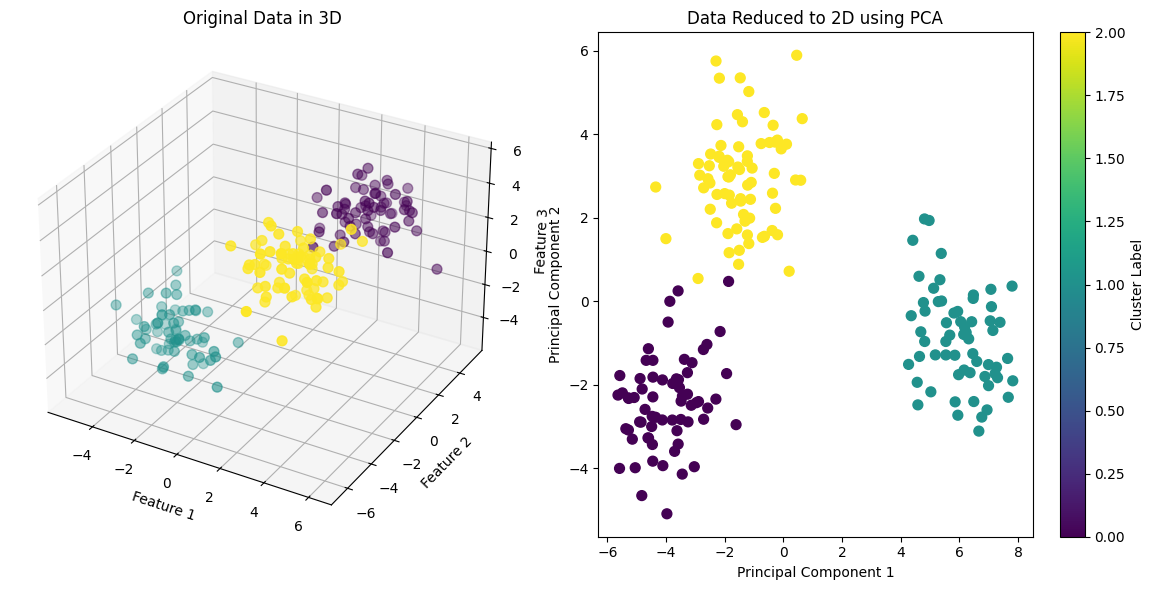

In [3]:
# Plot the original data in 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=50)
ax.set_title("Original Data in 3D")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")


# Standardize the data (zero mean)
data_mean = np.mean(data, axis=0)
data_centered = data - data_mean

# Compute covariance matrix
cov_matrix = np.cov(data_centered, rowvar=False)

# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Project the data onto the top 2 principal components
eigenvectors_reduced = eigenvectors[:, :2]
data_reduced = np.dot(data_centered, eigenvectors_reduced)

# Plot the reduced data in 2D
ax2 = fig.add_subplot(122)
scatter = ax2.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', s=50)
ax2.set_title("Data Reduced to 2D using PCA")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
plt.colorbar(scatter, ax=ax2, label="Cluster Label")

plt.tight_layout()
plt.show()

Explained Variance Ratio: [0.69763934 0.25762127]


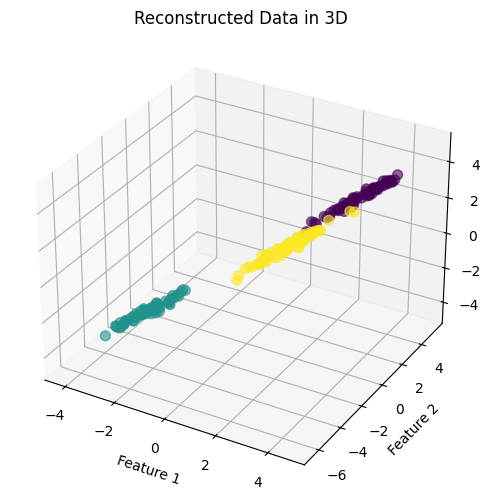

In [4]:
# Explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio[:2])

# Reconstruct the data back to 3D space (optional)
data_reconstructed = np.dot(data_reduced, eigenvectors_reduced.T) + data_mean

# Plot the reconstructed data in 3D to compare with the original data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_reconstructed[:, 0], data_reconstructed[:, 1], data_reconstructed[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6)
ax.set_title("Reconstructed Data in 3D")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()
